<a href="https://colab.research.google.com/github/khanittha-phusopha/DWDM21/blob/main/Chapter6_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/DWDM2021_DATA'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'), encoding='latin1')

In [7]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [24]:
data.sort_values(by=['InvoiceNo'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/09/2011 09:57,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,12/09/2011 10:28,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/09/2011 11:57,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/09/2011 11:58,1.25,17315.0,United Kingdom,-1.25


In [25]:
data[data['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
141,C536379,D,Discount,-1,12/01/2010 09:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/01/2010 09:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/09/2011 09:57,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,12/09/2011 10:28,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/09/2011 11:57,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/09/2011 11:58,1.25,17315.0,United Kingdom,-1.25


In [26]:
data[data['InvoiceNo'].str.contains('536391')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/01/2010 10:24,3.45,17548.0,United Kingdom,-41.40
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom,-19.80
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/01/2010 10:24,1.65,17548.0,United Kingdom,-39.60


In [27]:
data[data['CustomerID']==17548]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/01/2010 10:24,3.45,17548.0,United Kingdom,-41.40
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom,-19.80
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/01/2010 10:24,1.65,17548.0,United Kingdom,-39.60
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,4/20/2011 12:01,1.25,17548.0,United Kingdom,30.00
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,4/20/2011 12:01,1.65,17548.0,United Kingdom,16.50
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,4/20/2011 12:01,1.65,17548.0,United Kingdom,16.50


##ลบ records ที่ถูก cancel ออกไป

In [28]:
data_clean = data[data['Quantity']>=1]
data_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,16.60


## [Q] มีประเทศสาขาของ supermarket นี้ทั้งหมดกี่ประเทศ

In [8]:
set(data['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'Unspecified'}

In [9]:
len(set(data['Country']))

38

In [10]:
set(data['Description'])

{nan,
 'CINAMMON & ORANGE WREATH',
 'SPACEBOY WALL ART',
 'NECKLACE+BRACELET SET BLUE BLOSSOM',
 'PINK/BLUE DISC/MIRROR STRING',
 'FIRE POLISHED GLASS NECKL GREEN',
 'RED RETROSPOT APRON ',
 'FLORAL BATHROOM SET',
 'BLUE DROP EARRINGS W BEAD CLUSTER',
 'HOT WATER BOTTLE BABUSHKA ',
 '3D CHRISTMAS STAMPS STICKERS ',
 'RED LOVE HEART SHAPE CUP',
 'BLACK ORANGE SQUEEZER',
 'SET OF 36 PANTRY PAPER DOILIES',
 'had been put aside',
 'PACK OF 12 LONDON TISSUES ',
 'CURIO CABINET LINEN AND LACE ',
 'mailout',
 'PINK BEADS+HAND PHONE CHARM',
 'GIFT BAG BIRTHDAY',
 'Next Day Carriage',
 'PACK OF 60 SPACEBOY CAKE CASES',
 'PIN CUSHION BABUSHKA PINK',
 'RED RETROSPOT CHILDRENS UMBRELLA',
 'ZINC  STAR T-LIGHT HOLDER ',
 'test',
 'CHARLOTTE BAG ALPHABET  DESIGN',
 'HERB MARKER MINT',
 'PAPER POCKET TRAVELING FAN ',
 'SET OF 6 ICE CREAM SKITTLES',
 'MOP PENDANT SHELL NECKLACE',
 'FAMILY PHOTO FRAME CORNICE',
 'GREEN FERN JOURNAL ',
 'ORANGE VOTIVE CANDLE',
 '6PC WOOD PLATE SET DISPOSABLE',
 'SET 10 C

## [HW13] วาดกราฟสรุปจำนวน items และ ยอดขายของแต่ละประเทศ

In [29]:
data_clean['total']=data_clean['Quantity']*data_clean['UnitPrice']
data_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,10.20,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12.60,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,16.60,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,16.60,16.60


In [11]:
len(set(data['Description']))

4224

In [12]:
from matplotlib import pyplot as plt

##[HW13] วาดกราฟสรุปจำนวน items และ ยอดขายของแต่ละประเทศ

### ดูว่า คอลัมน์ไหนมี ค่า missing บ้าง

In [13]:
data.isnull().any() 

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

มี 2 คอลัมน์ ที่มีค่า missing คือ 'Description' กับ 'CustomerID' ซึ่งไม่จำเป็นต้องแก้ missing เพราะเป็นข้อมูลที่ไม่ต้องเติมก็ได้

##เพิ่มคอลัมน์ ยอดขาย (Quantity*UnitPrice)

In [14]:
data['sales'] = data.Quantity * data.UnitPrice
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,16.60


In [15]:
### จัดกลุ่ม ด้วย 'Country' และ sum ยอดขาย

data_sales = data.groupby('Country')[['sales']].sum()
data_sales

,sales
Country,
Australia,1.370773e+05
Austria,1.015432e+04
Bahrain,5.484000e+02
Belgium,4.091096e+04
Brazil,1.143600e+03
Canada,3.666380e+03
Channel Islands,2.008629e+04
Cyprus,1.294629e+04
Czech Republic,7.077200e+02


In [16]:
### reset index เพื่อเอา index ไปใช้งานต่อ

data_sales.reset_index(inplace=True)
data_sales

,Country,sales
0,Australia,1.370773e+05
1,Austria,1.015432e+04
2,Bahrain,5.484000e+02
3,Belgium,4.091096e+04
4,Brazil,1.143600e+03
5,Canada,3.666380e+03
6,Channel Islands,2.008629e+04
7,Cyprus,1.294629e+04
8,Czech Republic,7.077200e+02
9,Denmark,1.876814e+04


In [17]:
import numpy as np

# import เพื่อใช้งาน pyplot
from matplotlib import pyplot as plt

In [18]:
np.arange(len(data_sales.iloc[:,0]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

No handles with labels found to put in legend.


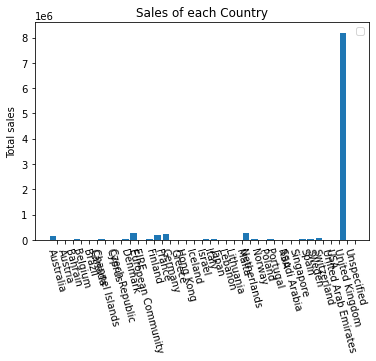

In [19]:
plt.bar(np.arange(len(data_sales.iloc[:,1])), data_sales.iloc[:,1])

plt.ylabel('Total sales')
plt.title('Sales of each Country')
plt.xticks(np.arange(len(data_sales.iloc[:,0]))+0.5, data_sales.iloc[:,0],rotation=-75)
plt.legend();

In [20]:
# ตัด 'United Kingdom' ออก

data_dropped_UK = data_sales.drop(36)
data_dropped_UK

,Country,sales
0,Australia,137077.27
1,Austria,10154.32
2,Bahrain,548.40
3,Belgium,40910.96
4,Brazil,1143.60
5,Canada,3666.38
6,Channel Islands,20086.29
7,Cyprus,12946.29
8,Czech Republic,707.72
9,Denmark,18768.14


No handles with labels found to put in legend.


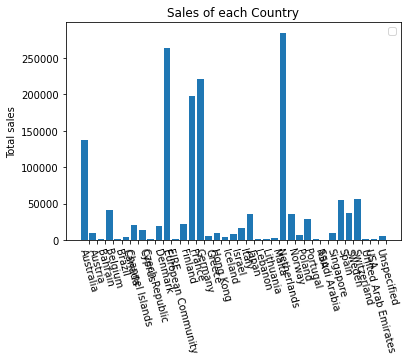

In [21]:
plt.bar(np.arange(len(data_dropped_UK.iloc[:,1])), data_dropped_UK.iloc[:,1])

plt.ylabel('Total sales')
plt.title('Sales of each Country')
plt.xticks(np.arange(len(data_dropped_UK.iloc[:,0]))+0.5, data_dropped_UK.iloc[:,0],rotation=-75)
plt.legend();

##เตรียม Data สำหรับ (Fequence Pattern) Association Rule

In [30]:
data_clean.groupby('InvoiceNo')['StockCode'].apply(list)

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
581586                          [22061, 23275, 21217, 20685]
581587     [22631, 22556, 22555, 22728, 22727, 22726, 227...
A563185                                                  [B]
A563186                                                  [B]
A563187                                                  [B]
Name: StockCode, Length: 20728, dtype: object

In [31]:
transactions = data_clean.groupby('InvoiceNo')['StockCode'].apply(list)

##Apriori
http://zaxrosenberg.com/unofficial-apyori-documentation/

In [32]:
!pip install apyori 

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=2a836158ff4ee915598ebd69f6ef26021a9618548bc6c7f619120357ecd3efda
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [33]:
from apyori import apriori

In [34]:
frequentItemsets = list(apriori(transactions,min_support = 0.1))
frequentItemsets

[RelationRecord(items=frozenset({'85099B'}), support=0.10092628328830568, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85099B'}), confidence=0.10092628328830568, lift=1.0)]),
 RelationRecord(items=frozenset({'85123A'}), support=0.10628135854882285, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85123A'}), confidence=0.10628135854882285, lift=1.0)])]

In [35]:
frequentItemsets = list(apriori(transactions,min_support = 0.035))
frequentItemsets

[RelationRecord(items=frozenset({'20712'}), support=0.041634504052489384, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20712'}), confidence=0.041634504052489384, lift=1.0)]),
 RelationRecord(items=frozenset({'20719'}), support=0.040283674257043614, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20719'}), confidence=0.040283674257043614, lift=1.0)]),
 RelationRecord(items=frozenset({'20724'}), support=0.04988421458896179, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20724'}), confidence=0.04988421458896179, lift=1.0)]),
 RelationRecord(items=frozenset({'20725'}), support=0.07550173678116558, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.07550173678116558, lift=1.0)]),
 RelationRecord(items=frozenset({'20726'}), support=0.04911231184870706, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozense

In [36]:
frequentItemsets[-1]

RelationRecord(items=frozenset({'22699', '22697'}), support=0.037051331532226936, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.037051331532226936, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7566502463054187, lift=14.71280141221268), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7204502814258911, lift=14.71280141221268)])

RelationRecord (items=frozenset({'22699', '22697'}), support=0.037051331532226936,

ordered_statistics=[ OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.037051331532226936, lift=1.0),

OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7566502463054187, lift=14.71280141221268),

OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7204502814258911, lift=14.71280141221268)])

In [37]:
data_clean[data_clean['StockCode']=='22697']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,total
1086,536524,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/01/2010 12:51,2.95,17572.0,United Kingdom,17.70,17.70
1644,536544,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/01/2010 14:32,5.91,NaN,United Kingdom,35.46,35.46
2793,536592,22697,GREEN REGENCY TEACUP AND SAUCER,3,12/01/2010 17:06,5.91,NaN,United Kingdom,17.73,17.73
3357,536623,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/02/2010 10:39,2.95,15601.0,United Kingdom,35.40,35.40
3422,536627,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/02/2010 10:53,2.95,15658.0,United Kingdom,35.40,35.40
...,...,...,...,...,...,...,...,...,...,...
539148,581433,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/08/2011 15:54,2.95,14911.0,EIRE,17.70,17.70
540215,581472,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/08/2011 19:55,2.95,15796.0,United Kingdom,35.40,35.40
540985,581492,22697,GREEN REGENCY TEACUP AND SAUCER,1,12/09/2011 10:03,5.79,NaN,United Kingdom,5.79,5.79
541220,581495,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/09/2011 10:20,2.95,14051.0,United Kingdom,35.40,35.40


In [38]:
data_clean[data_clean['StockCode']=='22699']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,total
1077,536523,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/01/2010 12:50,2.95,12868.0,United Kingdom,17.70,17.70
1193,536530,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 13:21,2.95,17905.0,United Kingdom,11.80,11.80
1645,536544,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/01/2010 14:32,5.91,NaN,United Kingdom,11.82,11.82
2794,536592,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 17:06,5.91,NaN,United Kingdom,23.64,23.64
3397,536624,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/02/2010 10:45,2.95,13418.0,United Kingdom,17.70,17.70
...,...,...,...,...,...,...,...,...,...,...
539671,581439,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/08/2011 16:30,5.79,NaN,United Kingdom,34.74,34.74
540213,581472,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/08/2011 19:55,2.95,15796.0,United Kingdom,35.40,35.40
540986,581492,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/09/2011 10:03,5.79,NaN,United Kingdom,11.58,11.58
541218,581495,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/09/2011 10:20,2.95,14051.0,United Kingdom,35.40,35.40


##(Quiz7) หา k-itemset ที่มีความน่าสนใจ (โดยพิจารณาลูกค้าเป็นรายคน) พร้อมทั้งอธิบายว่าน่าสนใจยังไง ส่งก่อน 11.25

In [39]:
data_clean.groupby(['CustomerID']).sum()

,Quantity,UnitPrice,sales,total
CustomerID,,,,
12346.0,74215,1.04,77183.60,77183.60
12347.0,2458,481.21,4310.00,4310.00
12348.0,2341,178.71,1797.24,1797.24
12349.0,631,605.10,1757.55,1757.55
12350.0,197,65.30,334.40,334.40
...,...,...,...,...
18280.0,45,47.65,180.60,180.60
18281.0,54,39.36,80.82,80.82
18282.0,103,62.39,178.05,178.05


In [40]:
data_clean.groupby('CustomerID')['StockCode'].apply(list)

CustomerID
12346.0                                              [23166]
12347.0    [85116, 22375, 71477, 22492, 22771, 22772, 227...
12348.0    [84992, 22951, 84991, 84991, 21213, 21213, 226...
12349.0    [23112, 23460, 21564, 21411, 21563, 22131, 221...
12350.0    [21908, 22412, 79066K, 79191C, 22348, 84086C, ...
                                 ...                        
18280.0    [82484, 22180, 22467, 22725, 22727, 22495, 223...
18281.0    [22037, 22716, 22028, 23007, 23008, 23209, 22467]
18282.0    [21270, 23187, 23295, 22089, 21108, 21109, 224...
18283.0    [22356, 20726, 22384, 22386, 20717, 20718, 850...
18287.0    [22755, 22754, 22753, 22756, 22758, 22757, 227...
Name: StockCode, Length: 4339, dtype: object

In [41]:
transactions = data_clean.groupby('CustomerID')['StockCode'].apply(list)

In [42]:
frequentItemsets = list(apriori(transactions,min_support = 0.1))
frequentItemsets

[RelationRecord(items=frozenset({'20725'}), support=0.12260889605899977, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.12260889605899977, lift=1.0)]),
 RelationRecord(items=frozenset({'20727'}), support=0.10555427517861259, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20727'}), confidence=0.10555427517861259, lift=1.0)]),
 RelationRecord(items=frozenset({'20728'}), support=0.11039410002304678, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20728'}), confidence=0.11039410002304678, lift=1.0)]),
 RelationRecord(items=frozenset({'21034'}), support=0.11062456787278174, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'21034'}), confidence=0.11062456787278174, lift=1.0)]),
 RelationRecord(items=frozenset({'21212'}), support=0.14634708458170084, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'

In [43]:
frequentItemsets = list(apriori(transactions,min_support = 0.035))
frequentItemsets

[RelationRecord(items=frozenset({'15036'}), support=0.04471076284858262, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'15036'}), confidence=0.04471076284858262, lift=1.0)]),
 RelationRecord(items=frozenset({'15056N'}), support=0.042406084351233005, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'15056N'}), confidence=0.042406084351233005, lift=1.0)]),
 RelationRecord(items=frozenset({'16161P'}), support=0.04355842359990781, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'16161P'}), confidence=0.04355842359990781, lift=1.0)]),
 RelationRecord(items=frozenset({'20676'}), support=0.042636552200967966, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20676'}), confidence=0.042636552200967966, lift=1.0)]),
 RelationRecord(items=frozenset({'20685'}), support=0.07582392256280249, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=froz

In [44]:
frequentItemsets[-1]

RelationRecord(items=frozenset({'22699', '22698', '22423', '22697'}), support=0.05162479834063148, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22698', '22423', '22697'}), confidence=0.05162479834063148, lift=1.0), OrderedStatistic(items_base=frozenset({'22423'}), items_add=frozenset({'22699', '22697', '22698'}), confidence=0.2542565266742338, lift=4.226892985591956), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699', '22423', '22698'}), confidence=0.5788113695090439, lift=10.778809151501036), OrderedStatistic(items_base=frozenset({'22698'}), items_add=frozenset({'22699', '22423', '22697'}), confidence=0.7021943573667712, lift=11.763788867237142), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697', '22423', '22698'}), confidence=0.5295508274231678, lift=9.378453225261735), OrderedStatistic(items_base=frozenset({'22423', '22697'}), items_add=frozenset({'22699', '22698'}), confidence=0

RelationRecord(items=frozenset({'22699', '22698', '22423', '22697'}), support=0.05162479834063148, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22698', '22423', '22697'}), confidence=0.05162479834063148, lift=1.0), OrderedStatistic(items_base=frozenset({'22423'}), items_add=frozenset({'22698', '22699', '22697'}), confidence=0.2542565266742338, lift=4.226892985591956), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22423', '22698', '22699'}), confidence=0.5788113695090439, lift=10.778809151501036), OrderedStatistic(items_base=frozenset({'22698'}), items_add=frozenset({'22423', '22699', '22697'}), confidence=0.7021943573667712, lift=11.763788867237142), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22698', '22423', '22697'}), confidence=0.5295508274231678, lift=9.378453225261735), OrderedStatistic(items_base=frozenset({'22423', '22697'}), items_add=frozenset({'22698', '22699'}), confidence=0.7542087542087542, lift=12.031293325410973), OrderedStatistic(items_base=frozenset({'22698', '22423'}), items_add=frozenset({'22699', '22697'}), confidence=0.8648648648648648, lift=11.690494232550305), OrderedStatistic(items_base=frozenset({'22423', '22699'}), items_add=frozenset({'22698', '22697'}), confidence=0.6978193146417445, lift=10.229182453481519), OrderedStatistic(items_base=frozenset({'22698', '22697'}), items_add=frozenset({'22423', '22699'}), confidence=0.7567567567567567, lift=10.229182453481517), OrderedStatistic(items_base=frozenset({'22697', '22699'}), items_add=frozenset({'22698', '22423'}), confidence=0.6978193146417445, lift=11.690494232550307), OrderedStatistic(items_base=frozenset({'22698', '22699'}), items_add=frozenset({'22423', '22697'}), confidence=0.823529411764706, lift=12.031293325410973), OrderedStatistic(items_base=frozenset({'22698', '22423', '22697'}), items_add=frozenset({'22699'}), confidence=0.9142857142857143, lift=9.378453225261737), OrderedStatistic(items_base=frozenset({'22699', '22423', '22697'}), items_add=frozenset({'22698'}), confidence=0.8648648648648648, lift=11.763788867237142), OrderedStatistic(items_base=frozenset({'22698', '22423', '22699'}), items_add=frozenset({'22697'}), confidence=0.9613733905579399, lift=10.778809151501036), OrderedStatistic(items_base=frozenset({'22698', '22697', '22699'}), items_add=frozenset({'22423'}), confidence=0.8582375478927203, lift=4.226892985591956)])

In [45]:
data_clean[data_clean['StockCode']=='22697']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,total
1086,536524,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/01/2010 12:51,2.95,17572.0,United Kingdom,17.70,17.70
1644,536544,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/01/2010 14:32,5.91,NaN,United Kingdom,35.46,35.46
2793,536592,22697,GREEN REGENCY TEACUP AND SAUCER,3,12/01/2010 17:06,5.91,NaN,United Kingdom,17.73,17.73
3357,536623,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/02/2010 10:39,2.95,15601.0,United Kingdom,35.40,35.40
3422,536627,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/02/2010 10:53,2.95,15658.0,United Kingdom,35.40,35.40
...,...,...,...,...,...,...,...,...,...,...
539148,581433,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/08/2011 15:54,2.95,14911.0,EIRE,17.70,17.70
540215,581472,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/08/2011 19:55,2.95,15796.0,United Kingdom,35.40,35.40
540985,581492,22697,GREEN REGENCY TEACUP AND SAUCER,1,12/09/2011 10:03,5.79,NaN,United Kingdom,5.79,5.79
541220,581495,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/09/2011 10:20,2.95,14051.0,United Kingdom,35.40,35.40


In [46]:
data_clean[data_clean['StockCode']=='22423']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,total
880,536477,22423,REGENCY CAKESTAND 3 TIER,16,12/01/2010 12:27,10.95,16210.0,United Kingdom,175.20,175.20
936,536502,22423,REGENCY CAKESTAND 3 TIER,2,12/01/2010 12:36,12.75,16552.0,United Kingdom,25.50,25.50
1092,536525,22423,REGENCY CAKESTAND 3 TIER,2,12/01/2010 12:54,12.75,14078.0,United Kingdom,25.50,25.50
1155,536528,22423,REGENCY CAKESTAND 3 TIER,1,12/01/2010 13:17,12.75,15525.0,United Kingdom,12.75,12.75
1197,536530,22423,REGENCY CAKESTAND 3 TIER,1,12/01/2010 13:21,12.75,17905.0,United Kingdom,12.75,12.75
...,...,...,...,...,...,...,...,...,...,...
539891,581449,22423,REGENCY CAKESTAND 3 TIER,1,12/08/2011 17:37,12.75,12748.0,United Kingdom,12.75,12.75
539892,581449,22423,REGENCY CAKESTAND 3 TIER,1,12/08/2011 17:37,12.75,12748.0,United Kingdom,12.75,12.75
540216,581472,22423,REGENCY CAKESTAND 3 TIER,2,12/08/2011 19:55,12.75,15796.0,United Kingdom,25.50,25.50
541231,581495,22423,REGENCY CAKESTAND 3 TIER,10,12/09/2011 10:20,12.75,14051.0,United Kingdom,127.50,127.50


In [47]:
data_clean[data_clean['StockCode']=='22698']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,total
19923,537955,22698,PINK REGENCY TEACUP AND SAUCER,1,12/09/2010 11:28,2.95,16782.0,United Kingdom,2.95,2.95
25508,538370,22698,PINK REGENCY TEACUP AND SAUCER,4,12/12/2010 11:06,2.95,16923.0,United Kingdom,11.80,11.80
30767,538880,22698,PINK REGENCY TEACUP AND SAUCER,1,12/14/2010 15:52,5.91,NaN,United Kingdom,5.91,5.91
79565,542997,22698,PINK REGENCY TEACUP AND SAUCER,1,02/02/2011 12:16,5.79,NaN,United Kingdom,5.79,5.79
80610,543043,22698,PINK REGENCY TEACUP AND SAUCER,10,02/02/2011 17:15,2.95,17848.0,United Kingdom,29.50,29.50
...,...,...,...,...,...,...,...,...,...,...
539670,581439,22698,PINK REGENCY TEACUP AND SAUCER,3,12/08/2011 16:30,5.79,NaN,United Kingdom,17.37,17.37
540214,581472,22698,PINK REGENCY TEACUP AND SAUCER,12,12/08/2011 19:55,2.95,15796.0,United Kingdom,35.40,35.40
541219,581495,22698,PINK REGENCY TEACUP AND SAUCER,12,12/09/2011 10:20,2.95,14051.0,United Kingdom,35.40,35.40
541450,581498,22698,PINK REGENCY TEACUP AND SAUCER,9,12/09/2011 10:26,5.79,NaN,United Kingdom,52.11,52.11


In [48]:
data_clean[data_clean['StockCode']=='22699']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,total
1077,536523,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/01/2010 12:50,2.95,12868.0,United Kingdom,17.70,17.70
1193,536530,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 13:21,2.95,17905.0,United Kingdom,11.80,11.80
1645,536544,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/01/2010 14:32,5.91,NaN,United Kingdom,11.82,11.82
2794,536592,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 17:06,5.91,NaN,United Kingdom,23.64,23.64
3397,536624,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/02/2010 10:45,2.95,13418.0,United Kingdom,17.70,17.70
...,...,...,...,...,...,...,...,...,...,...
539671,581439,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/08/2011 16:30,5.79,NaN,United Kingdom,34.74,34.74
540213,581472,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/08/2011 19:55,2.95,15796.0,United Kingdom,35.40,35.40
540986,581492,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/09/2011 10:03,5.79,NaN,United Kingdom,11.58,11.58
541218,581495,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/09/2011 10:20,2.95,14051.0,United Kingdom,35.40,35.40
